## Notebook E-tivity 2 CE4021 Linear Regression

Student name:Jorge Blanco

Student ID: 24246948

<hr style="border:2px solid gray"> </hr>

## Imports

In [373]:
import numpy as np
import matplotlib.pyplot as plt
from prompt_toolkit.input import Input

from __future__ import annotations # i want in all the methods specify the return type

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [374]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [375]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [376]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]


Apply data to linear regression algorithm to obtain weights

In [377]:
weights = linreg_weights(X,y)

In [378]:
data = np.loadtxt('lr_data.csv', delimiter=',')


(0.0, 3.0, -100.0, 1500.0)

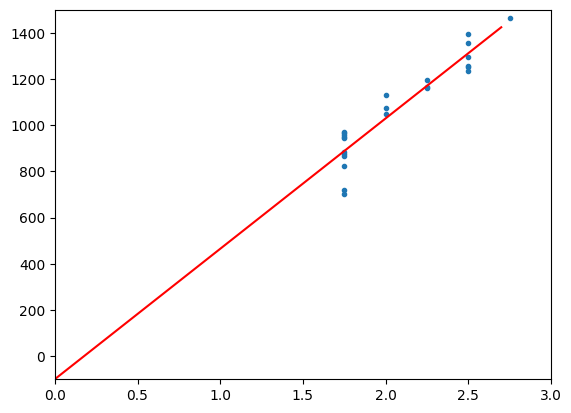

In [379]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

You may add as many cells as you require to complete this task. 
I added a cell for each method, makes it easy to test it

In [398]:
def transpose_matrix(matrix):
    # * matrix selects all the items in the matrix as independent items ie  [1, 1, 1, 1] [2, 2, 2, 2] [3, 3, 3, 3] [4, 4, 4, 4]
    # zip combines all the elements of the same index of each row in to a new item  in (1, 2, 3, 4)
    # that is how we shift the matrix 
    return [list(row) for row in zip(*matrix)]

In [399]:
print(transpose_matrix([[4, 4],[5, 5]]))

[[4, 5], [4, 5]]


In [443]:
def round_values_original_code(value):
    return round(value, 8)

In [444]:
print(round_values_original_code(-99.46426606000429))

-99.46426606


In [479]:
# perform the dot product of 2 vectors
def dot_vector(vector_left, vector_right): 
    
    if len(vector_left) != len(vector_right):
        raise ValueError("Vectors must be of the same length")
    
    return [sum([i*j for (i, j) in zip(vector_left, vector_right)])]

In [481]:
dot_vector([4, 1, 2, 3], [3, 1, 7, 2])

[33]

In [482]:
dot_vector([4, 1, 2], [3, 1, 7, 2])


ValueError: Vectors must be of the same length

In [453]:
# perform the dot product of two matrix
# multiple all the rows of the matrix_left by all the columns matrix_right
def dot_matrix(matrix_left, matrix_right) :
    
    if len(matrix_left[0]) != len(matrix_right):
        return ValueError('Matrix size mismatch.')
        
    # we get the rows of matrix_right , 
    # then using the zip(*.matrix_right) code we build the columns from the rows 
    # now that we have vectors with identical vectors we loop the index of each item and multiple and sum 
    #
    # matrix_left = [[1, 2],
    #                [2, 3]]
    # matrix_right = [[1 ,3],
    #                 [4, 5]]
    # zip(*matrix_right) --> [[1, 4], [3, 5]
    # in the last part we loop each vector using i as the index (since the list of vectors is of the same length)
    # sum(row[i] * column[i]... -->  acts as 1*1 + 2*4 
    #  1*1+2*4 = 9 
    #  1*3+2*5 = 13 ..
    # Why the transpose ? we want the columns of a matrix --> so we transpose and that is how we get the columns, without having to do any messed up logic   
    return [[sum((row[i] * column[i]) for i in range(len(column))) for column in transpose_matrix(matrix_right)] for row in matrix_left]

In [454]:
print(dot_matrix([[1, 2],[2, 3]],[[1 ,3],[4, 5]]))

[[9, 13], [14, 21]]


In [460]:
print(dot_matrix([[1, 3, -2],[4, 0, 5]],[[2 ,1],[3, -1]]))

Matrix size mismatch


In [455]:
print(dot_matrix([[2, 1],[0, 3]],[[1 ,1],[3, 2]]))


[[5, 4], [9, 6]]


In [406]:
# calculate the determinant of a 2 x 2 matrix , 
# using the math formula  a * d - b * c
# the function will throw an exception if the input is not a 2x2 matrix or if the determinant is zero
def calculate_determinant_2_x_2(matrix):
        
    a, b = matrix[0][0], matrix[0][1]
    c, d = matrix[1][0], matrix[1][1]
    
    determinant = (a * d) - (b * c)
    
    if determinant == 0:
        return ValueError("The determinant is 0, the matrix doesn't have an invertible matrix")
    
    return determinant

In [407]:
# formula to be used to calculate the inverse of a matrix  ==>  AA^-1 = I
# have A (matrix input), we can calculate I (identity metrix) , inverse can be calculated from that
# 1 / A (I)
def calculate_inverse_matrix(matrix):
   
    if len(matrix) != 2:
        raise ValueError('Sorry we are only calculating the invert of a 2x2 Matrix')
    
    determinant = calculate_determinant_2_x_2(matrix)
    
    a, b = matrix[0][0], matrix[0][1]
    c, d = matrix[1][0], matrix[1][1]
    
    return [
        [round_values_original_code(d / determinant), round_values_original_code(-b / determinant)],
        [round_values_original_code(-c / determinant), round_values_original_code(a / determinant)]
    ]

In [408]:
print(calculate_inverse_matrix([[9, 13], [14, 21]]))

[[3.0, -1.85714286], [-2.0, 1.28571429]]


In [484]:
#The job of the fit is to calculate the theta 
#theta = inv(X^T * X) * X^T * y
# the logic in the method is a breakdown of the above formula  
def fit(X,y):
    x_T = transpose_matrix(X)
    
    matrix_to_invert = dot_matrix(x_T, X)
    
    matrix_inverted = calculate_inverse_matrix(matrix_to_invert)
    
    return dot_matrix(dot_matrix(matrix_inverted, x_T), y)

#given the weight and sample data calculate thr output 
def predict(weight, dataPoints):
    
    weight_transposed = transpose_matrix(weight)
    
    out_predicate=[]
    for data_point in dataPoints:
        out_predicate.append(dot_vector(weight_transposed[0], data_point))
    
    return out_predicate

In [410]:
def get_input_data():
    data_task1 = np.loadtxt('lr_data.csv', delimiter=',')

# from the table extract 1 and 2 column values 
# [:, 0:2] for all the items in the array extract column 1 and 2
# Explanatory variable / Features / Training data
    X = data_task1[:,0:2]

# from the table extract the 3rd column values 
# numpy gives you the option to convert its array in to a list 
# [:, 2:3] for all the items in the array extract column 3  
# Response variable / Target values
    y = data_task1[:,2:3]
    
    return X, y

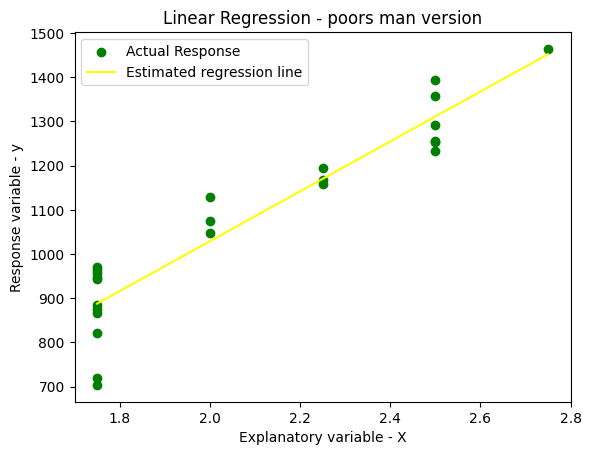

In [485]:
# -----------------------------------------------  execution logic     -----------------------------  
    
file_data = get_input_data()

weights = fit(file_data[0].tolist(), file_data[1].tolist())
predicate = predict(weights, file_data[0].tolist())

plt.scatter(file_data[0][:, 1], file_data[1], color='green', label='Actual Response')
plt.plot(file_data[0][:, 1], predicate, color='yellow', label='Estimated regression line')

plt.xlabel('Explanatory variable - X')
plt.ylabel('Response variable - y')
plt.title('Linear Regression - poor''s man version')
plt.legend()
plt.show()


In [289]:
# -----------------------------------------------  test logic     -----------------------------
file_data_test = get_input_data()

# data used by the original code 
X_np, y_np = file_data_test[0], file_data_test[1]

#print(f" X.T                                         -> {X_np.T}")
#print(f" X.T.dot(X)                                  -> {X_np.T.dot(X_np)}")
#print(f" np.linalg.inv((X.T.dot(X)))                 -> {np.linalg.inv((X_np.T.dot(X_np)))}")
#print(f" np.linalg.inv((X.T.dot(X))).dot(X.T)        -> {np.linalg.inv((X_np.T.dot(X_np))).dot(X_np.T)}")
#print(f" np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y) -> {np.linalg.inv((X_np.T.dot(X_np))).dot(X_np.T).dot(y_np)}")

# data used by the custom code 
X_custom, y_custom = file_data_test[0], file_data_test[1]

transpose_custom = transpose_matrix(X_custom)
#print(f" X_np.T  same     -> {np.allclose(X_np.T, transpose_custom)}")

transposed_dot_product = dot_matrix(transpose_custom, X_custom)
#print(f" X.T.dot(X) same  -> {np.allclose(X_np.T.dot(X_np), transposed_dot_product)}")

inverted_after_transposed_dot_product = calculate_inverse_matrix(transposed_dot_product)
#print(f" np.linalg.inv((X.T.dot(X))) same   -> {np.allclose(np.linalg.inv((X_np.T.dot(X_np))), inverted_after_transposed_dot_product)}")

inverted_dot_transposed_custom = dot_matrix(inverted_after_transposed_dot_product, transpose_custom)
#print(f" np.linalg.inv((X.T.dot(X))).dot(X.T) same   -> {np.allclose(np.linalg.inv((X_np.T.dot(X_np))).dot(X_np.T), inverted_dot_transposed_custom)}")

inverted_dot_transposed_custom_dot_y = dot_matrix(inverted_dot_transposed_custom, y_custom)
#print(f" np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y) same   -> {np.allclose(np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y), inverted_dot_transposed_custom_dot_y)}")

weights_np = linreg_weights(X_np,y_np)
weight_custom = fit(X_custom, y_custom)
print(f" weights same   -> {np.allclose(weights_np, weight_custom)}")

weights_np_transposed = weights_np.T
weight_custom_transposed = transpose_matrix(weight_custom)
#print(f" weights.T same   -> {np.allclose(weights_np_transposed, weight_custom_transposed)}")

X_test_random_point = [[1, 4], [1,2]]
predict_np = linreg_predict(weights_np, X_test_random_point)
predict_custom = predict(weight_custom, X_test_random_point)

print(f" predicats the same   -> {np.allclose(predict_np, predict_custom)}")


 weights.T same   -> True
 w[[-99.46426606000429, 564.2039907399998]]


In [500]:
class PoorManLinearEquation :
    """ JorgeVector.
    Custom implementation of the Linear Equation algorithm using the fit and predict methods
        
    """
            
    def __init__(self, data_filename) :
        self.data_filename = data_filename
          
    def get_input_data(self) -> InputDataPair :
        """Load the data from the source file to be used by the algorithm.
        
        :return: a tuple of X (type of Jorge Matrix) and y from the data source file
        """
          
        data_loaded_from_file = np.loadtxt(self.data_filename, delimiter=',')
            
        X_data = data_loaded_from_file[:,0:2]
        y_data = data_loaded_from_file[:,2:3]
    
        return self.InputDataPair(X_data, y_data)
    
    def fit_and_predict (self, input_user_data: InputDataPair, sample_data_points) -> JorgeVector :
        """Perform fit and predict
        
        Parameters
        ----------
        :param input_user_data: Training data and Target values
        :param sample_data_points: sample data points
        :return: the result of performing the dot product of the matrix on the left and right
        """
        weights = linearEquation.fit(input_user_data)
        return linearEquation.predict(weights, sample_data_points)
        
    def fit(self, input_user_data: InputDataPair) -> JorgeMatrix:
        """Calculate the weight for the input data.
        
        Parameters
        ----------
        :param input_user_data: Training data and Target values
        :return: weight/ theta based on the formula inv(X^T * X) * X^T * y
        """

        matrix_transposed = self.JorgeMatrix(input_user_data.X).transpose_matrix()

        matrix_inverted = matrix_transposed.dot_matrix(input_user_data.X).calculate_inverse_matrix_2_x_2()
        
        weight_for_input_data = matrix_inverted.dot_matrix(matrix_transposed.matrix).dot_matrix(input_user_data.y)

        return weight_for_input_data
    
    def predict(self, weight: JorgeMatrix, sample_data_points) -> JorgeVector:
        """Given the weight and sample data calculate the output 
        
        Parameters
        ----------
        :param weight: weight to be used on the data points
        :param sample_data_points: sample data points
        :return: predicates
        """
        
        weight_transposed = self.JorgeVector(weight.transpose_matrix().matrix[0])
        
        for data_point in sample_data_points:
            weight_transposed.dot_vector_append_predicate(data_point)

        return weight_transposed.out_predicate
    
    class InputDataPair : 
        """ InputDataPair.
        Util class to encapsulate the input data pair
        
        Attributes
        ----------
        X: training data .
        y: target value 
        """
        
        def __init__(self, X, y):
            self.X = X
            self.y = y
          
        def x_without_constant(self):
            """Fetch values for X without the constant column
        
            :return: values 
            """
            
            return self.X[:, 1]
    
    class JorgeVector:
        """ JorgeVector.
        Util class used to perform matrix: Transpose, Dot Product operation, Calculate the Determinant and Inverse
        
        Attributes:
        ----------
        vector: The vector to the left of the vector operations.
        out_predicate: A concatenation of dot products on the original vector 
        """
        
        def __init__(self, vector):
            self.vector = vector
            self.out_predicate = []
        
        def __make_new(self, vector):
            return type(self)(vector)
        
        def dot_vector_append_predicate(self, vector_right):
            predicate_to_append = self.__dot_vector(vector_right)
            return self.out_predicate.append(predicate_to_append)
    
        def __dot_vector(self, vector_right):
            """Perform a dot product of two vectors
        
            :exception: ValueError - if the two vectors are not the same size
            :param vector_right: vector to the right
            :return: the result of performing the dot product of the vector on the left and right
            """
            
            if len(self.vector) != len(vector_right):
                raise ValueError("Vectors must be of the same length")
    
            return [sum([i*j for (i, j) in zip(self.vector, vector_right)])]
            
    class JorgeMatrix:
        """ JorgeMatrix.
        Util class used to perform matrix: Transpose, Dot Product operation, Calculate the Determinant and Inverse
        
        Attributes:
        matrix: The matrix to the left of the matrix operations.
        """
        
        def __init__(self, matrix):
            self.matrix = matrix
        
        @staticmethod
        def __round_values_original_code(value):
            return round(value, 8)
    
        def __make_new(self, matrix):
            return type(self)(matrix)
    
        def transpose_matrix(self):
            """Transpose a matrix.
        
            :return: a matrix that is transposed
            """
            
            return self.__make_new([list(row) for row in zip(*self.matrix)])
        
        def dot_matrix(self, matrix_right) :
            """Perform a dot product of two matrix
        
            Parameters
            ----------
            :param matrix_right: matrix to the right
            :return: the result of performing the dot product of the matrix on the left and right
            """
            
            if len(self.matrix[0]) != len(matrix_right):
                return ValueError('Matrix size mismatch')
            
            return self.__make_new([[sum((row[i] * column[i]) for i in range(len(column))) for column in transpose_matrix(matrix_right)] for row in self.matrix])
        
        @staticmethod
        def calculate_determinant_2_x_2(x, x1, y, y1):
            """Calculate the determinant of a 2 x 2 matrix
        
            Parameters
            ----------
            :param x: [0][0] value 
            :param x1: [0][1] value 
            :param y: [1][0] value 
            :param y1: [1][1] value 
            :exception: ValueError - if the determinant is 0
            :return: the determinant of a 2 x 2 matrix
            """
                
            determinant = (x * y1) - (x1 * y)
            
            if determinant == 0:
                return ValueError("The determinant is 0, the matrix doesn't have an invertible matrix")
            
            return determinant
        
        def calculate_inverse_matrix_2_x_2(self):
            """Calculate the inverse of a 2 x 2 matrix
            
            :exception: ValueError - if the input matrix is not 2 x 2
            :exception: ValueError - if the matrix does now have an invertible matrix
            :return: the determinant of a 2 x 2 matrix
            """
           
            if len(self.matrix) != 2:
                raise ValueError('Sorry we are only calculating the invert of a 2x2 Matrix')
            
            x, x1 = self.matrix[0][0], self.matrix[0][1]
            y, y1 = self.matrix[1][0], self.matrix[1][1]
            
            determinant = self.calculate_determinant_2_x_2(x, x1, y, y1)
            
            return self.__make_new([
                [self.__round_values_original_code(y1 / determinant), self.__round_values_original_code(-x1 / determinant)],
                [self.__round_values_original_code(-y / determinant), self.__round_values_original_code(x / determinant)]
            ])

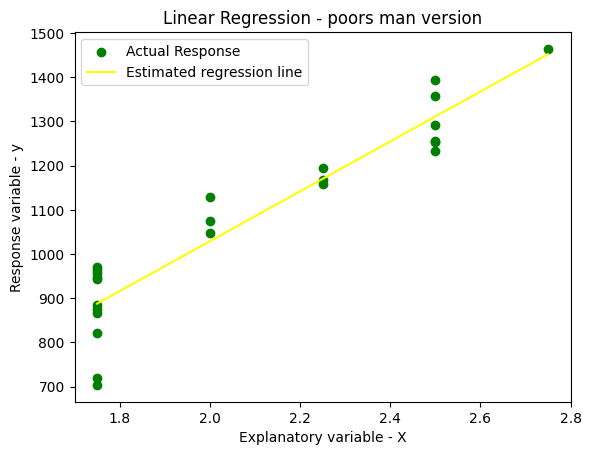

In [499]:
try:
    
    linearEquation = PoorManLinearEquation('lr_data.csv')

    input_data = linearEquation.get_input_data()
    
    predicate = linearEquation.fit_and_predict(input_data, input_data.X)
    
    plt.scatter(input_data.x_without_constant(), input_data.y, color='green', label='Actual Response')
    plt.plot(input_data.x_without_constant(), predicate, color='yellow', label='Estimated regression line')
    
    plt.xlabel('Explanatory variable - X')
    plt.ylabel('Response variable - y')
    plt.title('Linear Regression - poor''s man version')
    plt.legend()
    plt.show()
    
except ValueError as e:
    
  print(e) # stop execution if got an error 
  

## Reflection

Write your reflection in below cell.